 Dataset Loaded Successfully
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


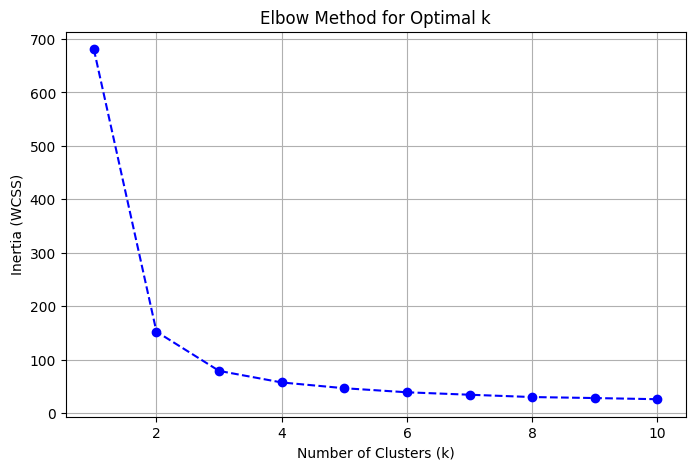


Cluster Counts:
 Cluster
0    62
1    50
2    38
Name: count, dtype: int64

Cluster Centers:
    sepal_length  sepal_width  petal_length  petal_width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.418000      1.464000     0.244000
2      6.850000     3.073684      5.742105     2.071053


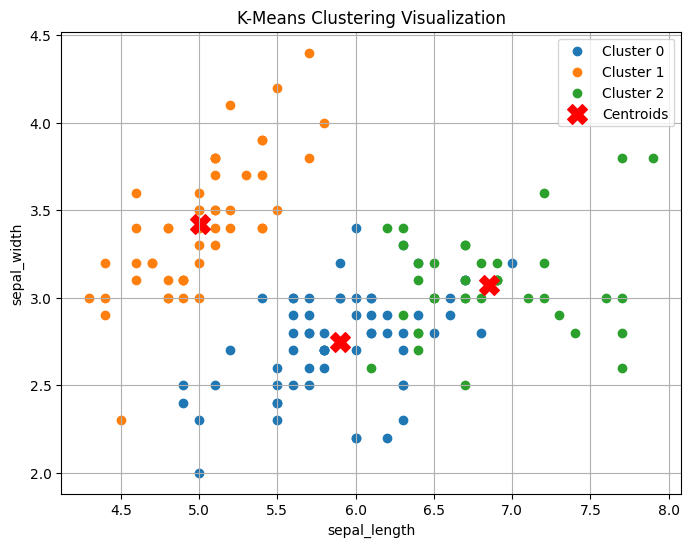

In [1]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#  Step 2: Load Dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
print(" Dataset Loaded Successfully\n", df.head())

#  Step 3: Prepare Features (Exclude Target Column)
X = df.drop("species", axis=1)

#  Step 4: Find Optimal K using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()

#  Step 5: Apply KMeans (k=3 for Iris)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

#  Step 6: Display Cluster Info
print("\nCluster Counts:\n", df["Cluster"].value_counts())
print("\nCluster Centers:\n", pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

#  Step 7: Visualize the Clusters (using first two features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for i in np.unique(labels):
    plt.scatter(X.iloc[labels == i, 0], X.iloc[labels == i, 1], label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='X', label='Centroids')

plt.title('K-Means Clustering Visualization')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.grid(True)
plt.show()
